# NYC's COVID-19 Rates by Sex

## 0. Import dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## 1. Read data

Read data from CSV file into Pandas DataFrame.

In [2]:
update_str = 'as of Apr 6, 2020'
source_str = 'Data: nyc.gov/coronavirus - Plot: carlos-afonso.github.io/COVID-19'

file = '../data/nychealth-coronavirus-data/by-sex.csv'
df = pd.read_csv(file)
df

,SEX_GROUP,COVID_CASE_RATE,HOSPITALIZED_CASE_RATE,DEATH_RATE
0,Female,712.97,140.37,23.15
1,Male,932.63,228.73,42.91
2,Citywide total,818.88,182.56,32.60


## 2. Clean data

In [3]:
df.replace('Citywide total', 'All', inplace=True)

col_rename_dict = {
    'SEX_GROUP': 'group',
    'COVID_CASE_RATE': 'case_rate',
    'HOSPITALIZED_CASE_RATE': 'hosp_rate',
    'DEATH_RATE': 'death_rate'
}

df.rename(columns=col_rename_dict, inplace=True)

df

,group,case_rate,hosp_rate,death_rate
0,Female,712.97,140.37,23.15
1,Male,932.63,228.73,42.91
2,All,818.88,182.56,32.60


## 3. Plot data

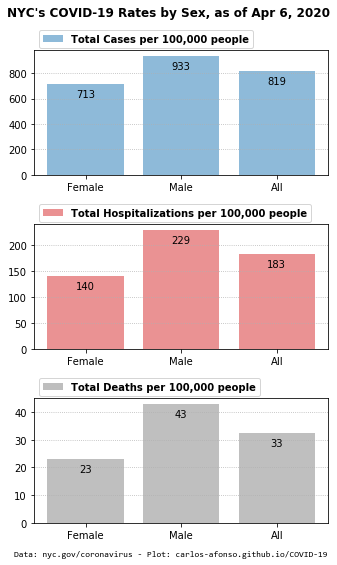

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(5, 8), sharex=False)

ax1.bar(df['group'], df['case_rate'], alpha=0.5, color='C0', label='Total Cases per 100,000 people')
ax2.bar(df['group'], df['hosp_rate'], alpha=0.5, color='C3', label='Total Hospitalizations per 100,000 people')
ax3.bar(df['group'], df['death_rate'], alpha=0.5, color='gray', label='Total Deaths per 100,000 people')

for ax in (ax1, ax2, ax3):
    ax.grid(axis='y', linestyle=':')
    ax.legend(bbox_to_anchor=(0, 1.2), loc='upper left', prop={'weight':'bold'})
    for i in ax.patches:
        [x, y] = [i.get_x(), i.get_height()]
        ax.annotate(str(int(round(y))), xy=[x, y], xytext=(38, -10), textcoords='offset points', ha='center', va='center')

plt.suptitle('NYC\'s COVID-19 Rates by Sex, ' + update_str, fontweight='bold', x=0.48) # fontsize=13

ax3.text(-0.75, -12, source_str, fontfamily='Consolas', fontsize=8.6)

plt.tight_layout(pad=1.2, rect=[0, 0, 1, 0.96])
plt.show()

In [5]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-rates-by-sex'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)